In [26]:
!pip install pandas
!pip install numpy
#!pip install pandas-profiling==2.7.1
!pip install pycaret
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os

!pip install seaborn
import seaborn as sns

from pandas.api.types import CategoricalDtype
#Train_label = pd.read_csv('Training set labels.csv')
#Train_value = pd.read_csv('Training set values.csv')
Train = pd.read_csv('Train_clean.csv')
#Train = pd.merge(Train_value,Train_label, how='inner',left_on='id',right_on='id', left_index=False)

  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)


  Using cached visions-0.7.1-py3-none-any.whl (102 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [2]:
from pycaret.utils import version
version()

'2.3.2'

In [3]:
Train.isnull().sum()

Unnamed: 0               0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

In [28]:
Train['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [29]:
year_Cluster = Train[['longitude','latitude','region_code']]
year_Cluster
#,'construction_year'
# ,'funder','installer'

longitude   latitude  region_code
0      34.938093  -9.856322           11
1      34.698766  -2.147466           20
2      37.460664  -3.821329           21
3      38.486161 -11.155298            9
4      31.130847  -1.825359            8
...          ...        ...          ...
59395  37.169807  -3.253847            3
59396  35.249991  -9.070629           11
59397  34.017087  -8.750434           12
59398  35.861315  -6.378573            1
59399  38.104048  -6.747464            5

[59400 rows x 3 columns]

In [30]:
from pycaret.clustering import *
clu1 = setup(year_Cluster, session_id=123, log_experiment=True, log_plots = True, 
             experiment_name='construction')

In [31]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [32]:
kmeans = create_model('kmeans', num_clusters = 10)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.4314         55879.0794          0.9078            0           0   

   Completeness  
0             0

In [33]:
kmodes = create_model('kmodes', num_clusters = 10)

Silhouette  Calinski-Harabasz  Davies-Bouldin  Homogeneity  Rand Index  \
0      0.1061           6368.842          1.8118            0           0   

   Completeness  
0             0

In [39]:
kmeans_results = assign_model(kmeans)
kmeans_results

longitude   latitude  region_code    Cluster
0      34.938093  -9.856322           11  Cluster 7
1      34.698766  -2.147466           20  Cluster 6
2      37.460664  -3.821329           21  Cluster 8
3      38.486161 -11.155298            9  Cluster 4
4      31.130847  -1.825359            8  Cluster 2
...          ...        ...          ...        ...
59395  37.169807  -3.253847            3  Cluster 8
59396  35.249991  -9.070629           11  Cluster 7
59397  34.017087  -8.750434           12  Cluster 0
59398  35.861315  -6.378573            1  Cluster 9
59399  38.104048  -6.747464            5  Cluster 1

[59400 rows x 4 columns]

In [40]:
plot_model(kmeans)

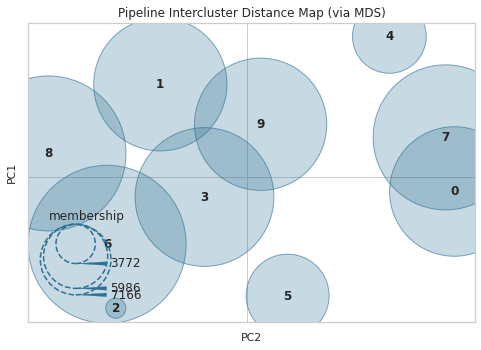

In [41]:
plot_model(kmeans, plot = 'distance')


In [42]:
kmeans_results['construction_year'] = Train['construction_year']
kmeans_results

longitude   latitude  region_code    Cluster  construction_year
0      34.938093  -9.856322           11  Cluster 7               1999
1      34.698766  -2.147466           20  Cluster 6               2010
2      37.460664  -3.821329           21  Cluster 8               2009
3      38.486161 -11.155298            9  Cluster 4               1986
4      31.130847  -1.825359            8  Cluster 2                  0
...          ...        ...          ...        ...                ...
59395  37.169807  -3.253847            3  Cluster 8               1999
59396  35.249991  -9.070629           11  Cluster 7               1996
59397  34.017087  -8.750434           12  Cluster 0                  0
59398  35.861315  -6.378573            1  Cluster 9                  0
59399  38.104048  -6.747464            5  Cluster 1               2002

[59400 rows x 5 columns]

In [43]:
kmeans_results.loc[kmeans_results['construction_year'] == 0]

longitude  latitude  region_code    Cluster  construction_year
4      31.130847 -1.825359            8  Cluster 2                  0
6      33.362410 -3.766365           17  Cluster 6                  0
7      32.620617 -4.226198           17  Cluster 6                  0
8      32.711100 -5.146712           14  Cluster 3                  0
9      30.626991 -1.257051            8  Cluster 2                  0
...          ...       ...          ...        ...                ...
59384  30.667805 -2.483710            8  Cluster 2                  0
59392  33.009440 -8.520888           12  Cluster 0                  0
59393  33.866852 -4.287410           14  Cluster 3                  0
59397  34.017087 -8.750434           12  Cluster 0                  0
59398  35.861315 -6.378573            1  Cluster 9                  0

[20709 rows x 5 columns]

In [44]:
test_year = kmeans_results.loc[kmeans_results['construction_year'] != 0]
test_year

longitude   latitude  region_code    Cluster  construction_year
0      34.938093  -9.856322           11  Cluster 7               1999
1      34.698766  -2.147466           20  Cluster 6               2010
2      37.460664  -3.821329           21  Cluster 8               2009
3      38.486161 -11.155298            9  Cluster 4               1986
5      39.172796  -4.765587            4  Cluster 1               2009
...          ...        ...          ...        ...                ...
59391  38.044070  -4.272218            3  Cluster 8               1967
59394  37.634053  -6.124830            5  Cluster 9               2007
59395  37.169807  -3.253847            3  Cluster 8               1999
59396  35.249991  -9.070629           11  Cluster 7               1996
59399  38.104048  -6.747464            5  Cluster 1               2002

[38691 rows x 5 columns]

In [45]:
pd.pivot_table(test_year,index=["region_code","Cluster"],values=["construction_year"],aggfunc=[np.mean]).astype(int)

mean
                      construction_year
region_code Cluster                    
2           Cluster 6              2004
            Cluster 8              1998
3           Cluster 8              1996
4           Cluster 1              1992
            Cluster 8              2006
            Cluster 9              1996
5           Cluster 1              1997
            Cluster 7              1995
            Cluster 9              1995
6           Cluster 1              2002
            Cluster 4              2006
7           Cluster 1              2001
8           Cluster 4              1994
9           Cluster 4              1992
            Cluster 7              1993
10          Cluster 1              1989
            Cluster 3              2009
            Cluster 4              1998
            Cluster 7              1997
            Cluster 9              2002
11          Cluster 7              1998
            Cluster 9              1992
13          Cluster 3              1994
15          Cluster 0              1989
            Cluster 5              1990
16          Cluster 2              1998
            Cluster 5              1998
17          Cluster 6              2002
19          Cluster 6              1994
20          Cluster 6              1997
21          Cluster 1              1983
            Cluster 3              2003
            Cluster 8              2000
            Cluster 9              2003

In [46]:
base_year = pd.DataFrame(pd.pivot_table(test_year,index=["Cluster"],values=["construction_year"],aggfunc=[np.mean]).astype(int).to_records())
base_year

Cluster  ('mean', 'construction_year')
0  Cluster 0                           1989
1  Cluster 1                           1998
2  Cluster 2                           1998
3  Cluster 3                           1996
4  Cluster 4                           1994
5  Cluster 5                           1996
6  Cluster 6                           1997
7  Cluster 7                           1997
8  Cluster 8                           1997
9  Cluster 9                           1995

In [47]:
base_year = base_year.rename(columns={"('mean', 'construction_year')":'year'})
base_year

Cluster  year
0  Cluster 0  1989
1  Cluster 1  1998
2  Cluster 2  1998
3  Cluster 3  1996
4  Cluster 4  1994
5  Cluster 5  1996
6  Cluster 6  1997
7  Cluster 7  1997
8  Cluster 8  1997
9  Cluster 9  1995

In [48]:
dict = base_year.set_index('Cluster')['year'].to_dict()
dict['Cluster 0']
dict

{'Cluster 0': 1989,
 'Cluster 1': 1998,
 'Cluster 2': 1998,
 'Cluster 3': 1996,
 'Cluster 4': 1994,
 'Cluster 5': 1996,
 'Cluster 6': 1997,
 'Cluster 7': 1997,
 'Cluster 8': 1997,
 'Cluster 9': 1995}

In [49]:
pd.pivot_table(test_year,index=["region_code"],values=["construction_year"],aggfunc=[np.mean]).astype(int)

mean
            construction_year
region_code                  
2                        1998
3                        1996
4                        1992
5                        1996
6                        2002
7                        2001
8                        1994
9                        1992
10                       1997
11                       1997
13                       1994
15                       1989
16                       1998
17                       2002
19                       1994
20                       1997
21                       2002

In [50]:
kmeans_results

longitude   latitude  region_code    Cluster  construction_year
0      34.938093  -9.856322           11  Cluster 7               1999
1      34.698766  -2.147466           20  Cluster 6               2010
2      37.460664  -3.821329           21  Cluster 8               2009
3      38.486161 -11.155298            9  Cluster 4               1986
4      31.130847  -1.825359            8  Cluster 2                  0
...          ...        ...          ...        ...                ...
59395  37.169807  -3.253847            3  Cluster 8               1999
59396  35.249991  -9.070629           11  Cluster 7               1996
59397  34.017087  -8.750434           12  Cluster 0                  0
59398  35.861315  -6.378573            1  Cluster 9                  0
59399  38.104048  -6.747464            5  Cluster 1               2002

[59400 rows x 5 columns]

In [51]:
# mapp using base_year to replace zero 
#kmeans_results.loc[kmeans_results['construct_years'] == 0, 'construct_years' ] = base_year[:1]
#kmeans_results.loc[kmeans_results.Cluster.isin(base_year.Cluster),'construction_year'] = base_year['year']

#kmeans_results['construction_year'] = kmeans_results['construction_year'].apply(lambda x: x.Cluster.map(dict) if x == 0 else x) 
#df.customer.map(genders_dict)

#if kmeans_results['construction_year'].eq(0).any():
#    kmeans_results['construction_year'] = kmeans_results.Cluster.map(dict)

kmeans_results.loc[kmeans_results['construction_year'] == 0, 'construction_year'] = kmeans_results.Cluster.map(dict)
    
    

In [52]:
kmeans_results

longitude   latitude  region_code    Cluster  construction_year
0      34.938093  -9.856322           11  Cluster 7               1999
1      34.698766  -2.147466           20  Cluster 6               2010
2      37.460664  -3.821329           21  Cluster 8               2009
3      38.486161 -11.155298            9  Cluster 4               1986
4      31.130847  -1.825359            8  Cluster 2               1998
...          ...        ...          ...        ...                ...
59395  37.169807  -3.253847            3  Cluster 8               1999
59396  35.249991  -9.070629           11  Cluster 7               1996
59397  34.017087  -8.750434           12  Cluster 0               1989
59398  35.861315  -6.378573            1  Cluster 9               1995
59399  38.104048  -6.747464            5  Cluster 1               2002

[59400 rows x 5 columns]


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(year_Cluster['construction_year'], ax=ax1)
sns.histplot(Construct_year['construction_year'],ax=ax2)
plt.show()


In [53]:
kmeans_results.loc[kmeans_results['construction_year'] == 0]

Empty DataFrame
Columns: [longitude, latitude, region_code, Cluster, construction_year]
Index: []

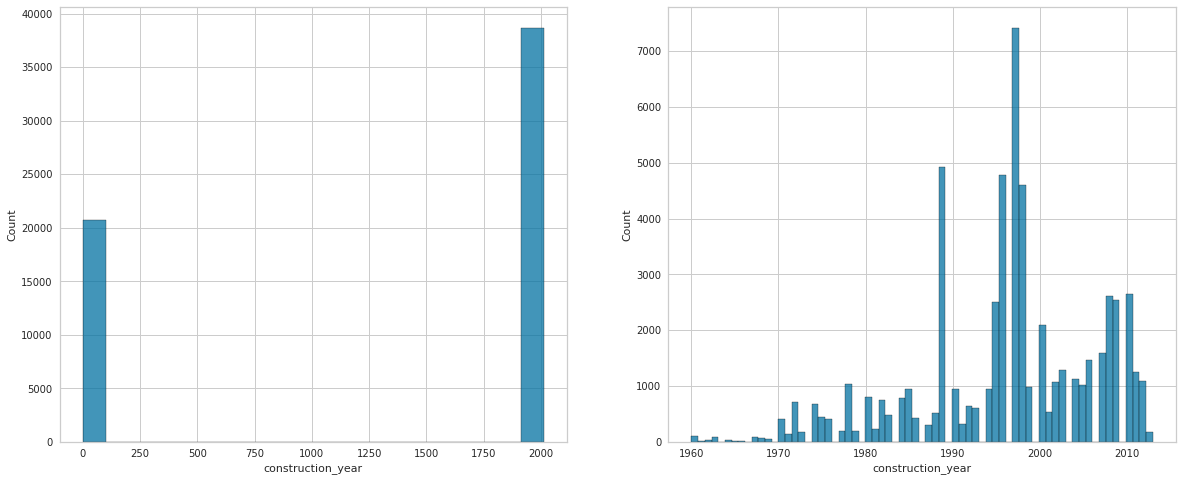

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
sns.histplot(Train['construction_year'], ax=ax1)
sns.histplot(kmeans_results['construction_year'],ax=ax2)
plt.show()

In [55]:
Train['construction_year'] = kmeans_results['construction_year']

<AxesSubplot:>

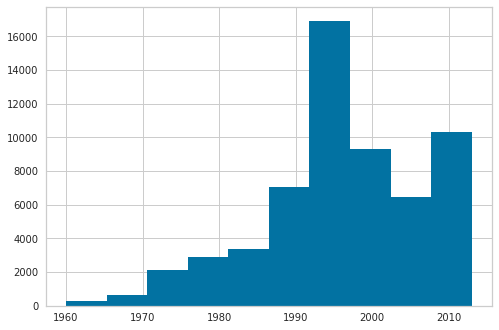

In [56]:
Train['construction_year'].hist()

In [57]:
Train.to_csv('Train_clean2.csv')

In [58]:
Train.isnull().sum()

Unnamed: 0               0
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s